## Лаба 1

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.signal import butter, filtfilt

In [ ]:
def test1(n):
    
    # создаём шум
    X = np.transpose([*np.zeros(n), *np.ones(n),*np.zeros(n)])
    N = 0.7
    F_max = 0.1
    sigma = math.sqrt(0.3 * N * F_max)
    
    S = np.random.standard_normal((1,3*n))
    X_new = X + sigma*S
    
    # filtfilt
    cutoff_freq = 0.15
    b,a = butter(5,cutoff_freq, btype='low', analog=False)#'lowpass')    
    Filt = filtfilt(b, a, X_new[0])
    
    # lowess
    cutoff_fraq = 0.07
    Y = np.zeros(300)
    for i in range(300-1):
        Y[i+1] = Y[i] + 1
    result = lowess(X_new[0], Y, cutoff_fraq)
    y_smooth = result[:,1]
    
    
    # графики
    fig = plt.figure(figsize=(10,5))
    plt.plot(X_new[0], color = 'gray', label = 'Noise')
    plt.plot(X, color = 'pink', label = 'Orig')
    
    plt.plot(Filt, color = 'green', label = 'Filtfilt')
    plt.plot(y_smooth, color = 'blue', label = 'Lowess')
    #plt.plot(pressure_smooth, color = 'red')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # отношение мощностей
    integral_lowess = np.trapz((y_smooth**2), Y)/n
    print('P of Lowess ',integral_lowess)
    integral_butter = np.trapz((Filt**2), Y)/n
    print('P of Butter ',integral_butter)
    integral_noise = np.trapz((X_new[0]**2), Y)/n
    print('P of Noise ',integral_noise)
    
    print('Отношение мощности сигнала после Lowess фильтра к мощности шума помноженный на 10lg',10*np.log10(integral_lowess/integral_noise))
    
    print('Отношение мощности сигнала после Butter фильтра к мощности шума помноженный на 10lg',10*np.log10(integral_butter/integral_noise))
    #, integral_lowess/integral_noise ,integral_butter/integral_noise

P of Lowess  0.9355314797020238
P of Butter  0.9738379474543362
P of Noise  1.0451353746665666
Отношение мощности сигнала после Lowess фильтра к мощности шума помноженный на 10lg -0.4811414188229042
Отношение мощности сигнала после Butter фильтра к мощности шума помноженный на 10lg -0.3068585388771997


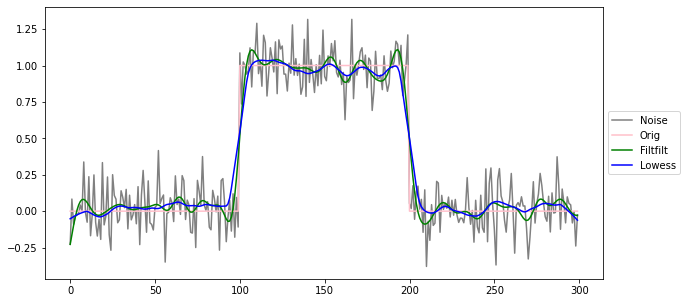

In [ ]:
test1(100)

## Лаба 2

In [ ]:
import math
import numpy as np
from numpy import convolve
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.signal import butter, filtfilt

In [ ]:
def test2(n):
    
    # создаём шум
    X = np.transpose([*np.zeros(n), *np.ones(n),*np.zeros(n)])
    N = 100.
    F_max = 0.1
    sigma = math.sqrt(0.3 * N * F_max)
    
    S = np.random.standard_normal((1,3*n))
    X_new = X + sigma*S
    
    X_conv = convolve(X_new[0],X)
    
    # графики
    fig = plt.figure(figsize=(10,3))
    plt.plot(X_new[0], color = 'gray', label = 'Noise')
    plt.plot(X, color = 'pink', label = 'Orig')
    #plt.plot(X_conv, color = 'green', label = 'Convolve')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
   
    fig2 = plt.figure(figsize=(10,3))
    #plt.plot(X_new[0], color = 'gray', label = 'Noise')
    plt.plot(convolve(X,X), color = 'pink', label = 'Convolve no noise')
    plt.plot(X_conv, color = 'green', label = 'Convolve')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

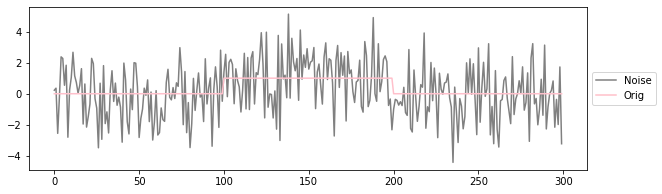

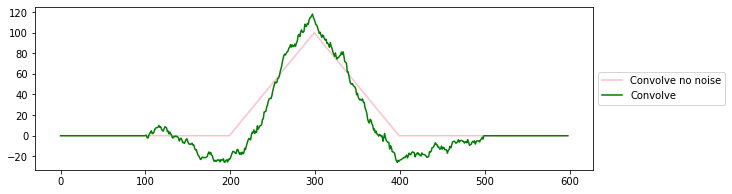

In [ ]:
test2(100)

## Лаба 3

In [ ]:
import math
import numpy as np
from numpy import convolve
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy
from scipy.signal import butter, filtfilt

In [ ]:
def test3(n):
    
    # дискретизируем аналоговый сигнал
    X = np.transpose([*np.ones(2**n),*np.zeros(2**n)])
        #np.asarray([1]*2**n)
    #X = np.zeros(2**n)
    #for i in range(2**n):
    #    X[i] = 1 #math.sin(i/10)
    
    fx = np.fft.fft(X)
    fx_a = abs(fx)
    
    F_after = np.zeros(2*2**n)
    for i in range(2**n):
        F_after[i] = fx_a[i+2**n]
        F_after[i+2**n] = fx_a[i]
    
    # графики
    fig = plt.figure(figsize=(10,3))
    #plt.plot(X_new[0], color = 'gray', label = 'Noise')
    plt.plot(X, color = 'pink', label = 'Orig')
    plt.plot(F_after, color = 'green', label = 'fft')
    
    
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

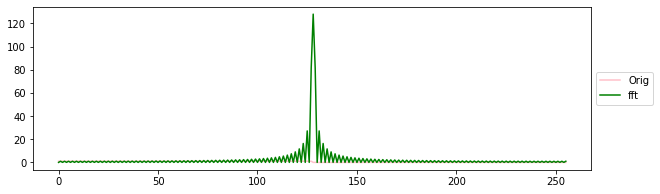

In [ ]:
test3(7)

In [ ]:
def test3_2(n):
    
    # дискретизируем аналоговый сигнал
    X = np.transpose([*np.ones(32),*np.zeros(2**n)])
        #np.asarray([1]*2**n)
    #X = np.zeros(2**n)
    #for i in range(2**n):
    #    X[i] = 1 #math.sin(i/10)
    
    fx = np.fft.fft(X)
    fx_a = abs(fx)
    
    n_n = 16+2**(n-1)
    
    F_after = np.zeros(n_n*2)
    for i in range(n_n):
        F_after[i] = fx_a[i+n_n]
        F_after[i+n_n] = fx_a[i]
    
    # графики
    fig = plt.figure(figsize=(10,3))
    #plt.plot(X_new[0], color = 'gray', label = 'Noise')
    #plt.plot(X, color = 'pink', label = 'Orig')
    plt.plot(F_after, color = 'green', label = 'fft')
    
    
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

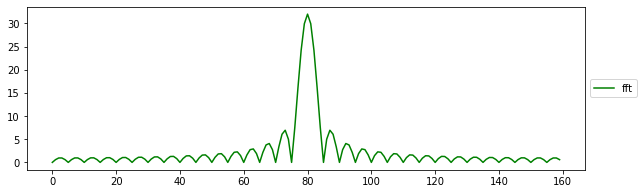

In [ ]:
test3_2(7)

In [ ]:
def test3_3(n):
    
    # дискретизируем аналоговый сигнал
    X = np.transpose([*np.ones(2**n),*np.zeros(2**n)])
    
    fx = np.fft.fft(X)
    fx_a = abs(fx)
    
    F_after = np.zeros(2*2**n)
    
    for i in range(2**n):
        F_after[i] = fx_a[i+2**n]
        F_after[i+2**n] = fx_a[i]
    
    z = np.zeros(2*2**n)
    
    for i in range(2*2**n):
        z[i] = fx[i]*fx[i]
        
    # графики
    fig = plt.figure(figsize=(10,3))
    
    plt.plot(np.fft.ifft(z), color = 'green', label = 'z')
    
    
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


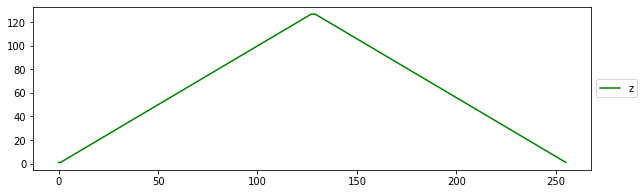

In [ ]:
test3_3(7)

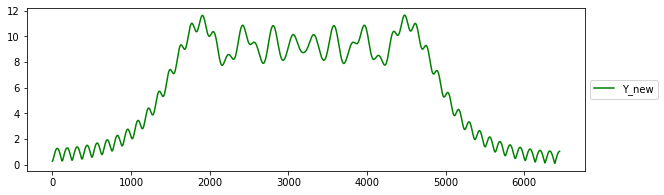

In [ ]:
def alp(w_min,w_max,t_len):
    return (w_max-w_min)/t_len

def test3_4():
    w_min = 1000
    w_max = 10000
    t0 = 0
    t1 = 1
    h = 0.01
    
    freq = lambda t: w_min + alpha * t
    t_len = int((t1-t0)/h)
    alpha = alp(w_min,w_max,t_len)
    
    # дискретизируем аналоговый сигнал
    T = np.linspace(t0, t1, t_len)
    X = np.asarray([math.cos(t*freq(t)) for t in T]) # добавить нули
    X_new = np.hstack((X, np.zeros(128*t_len)))
    
    # применяем fft
    Y = np.fft.fft(X_new)
    Y_1 = Y[:int(len(Y)/2)]
    Y_2 = Y[int(len(Y)/2):]
    
    Y_new = abs(Y_1)
    
    # график
    fig = plt.figure(figsize=(10,3))
    plt.plot(Y_new, color = 'green', label = 'Y_new')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
test3_4()    

## Лаба 4

In [ ]:
import math
import numpy as np
from numpy import convolve
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy
from scipy.signal import butter, filtfilt

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part


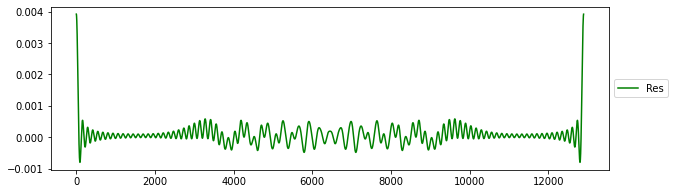

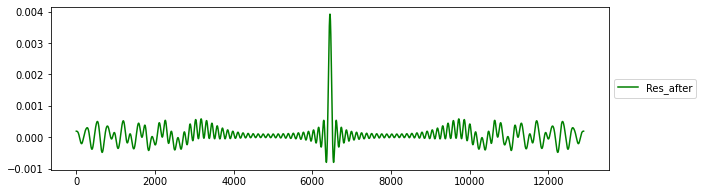

In [ ]:
def alp(w_min,w_max,t_len):
    return (w_max-w_min)/t_len

def test4():
    w_min = 1000
    w_max = 10000
    t0 = 0
    t1 = 1
    h = 0.01
    
    freq = lambda t: w_min + alpha * t
    t_len = int((t1-t0)/h)
    alpha = alp(w_min,w_max,t_len)
    
    # дискретизируем аналоговый сигнал
    T = np.linspace(t0, t1, t_len)
    X = np.asarray([math.cos(t*freq(t)) for t in T]) # добавить нули
    X_new = np.hstack((X, np.zeros(128*t_len)))
    
    # применяем ifft
    X_prod = X_new * X_new
    Res = np.fft.ifft(X_prod)
    N_res = len(Res)
    
    # график
    fig = plt.figure(figsize=(10,3))
    plt.plot(Res, color = 'green', label = 'Res')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    # делем пополам и меняем местами
    Res_after = np.zeros(N_res)
    for i in range(int(N_res/2)):
        Res_after[i] = Res[i+int(N_res/2)]
        Res_after[i+int(N_res/2)] = Res[i]
    
    # график
    fig = plt.figure(figsize=(10,3))
    plt.plot(Res_after, color = 'green', label = 'Res_after')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

    
test4()    

## Лаба 5

In [ ]:
import math
import numpy as np
from numpy import convolve
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy
from scipy.signal import butter, filtfilt
import cmath

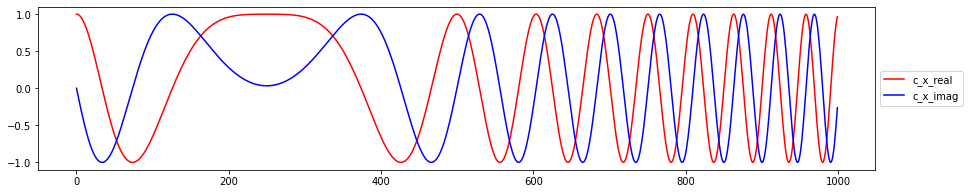

In [ ]:
# 1.5 (fft + ifft) debug 2
# лчм сигнал на согласованный фильтр, при условии, что комплексные огибающие заданы определённым образом


def test5():
    # задаём данные
    delta_w = 5
    t0 = 0
    t1 = 10 # T
    T = t1 - t0
    h = 0.01
    
    t_len = int(T/h)
    ts = np.linspace(t0,t1,t_len)
    
    # комплексные огибающие до фильтра
    c_x_real = np.real(np.exp((0 + 1j) * ( - delta_w * ts + 2.0 / T * delta_w * ts *ts)))
    c_x_imag = np.imag(np.exp((0 + 1j) * ( - delta_w * ts + 2.0 / T * delta_w * ts *ts)))
    
    # графики
    fig = plt.figure(figsize=(15,3))
    plt.plot(c_x_real, color = 'red', label = 'c_x_real')
    plt.plot(c_x_imag, color = 'blue', label = 'c_x_imag')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    '''
    # добавляем нули
    c_x_real = np.hstack((c_x_real, np.zeros(t_len)))
    c_x_imag = np.hstack((c_x_imag, np.zeros(t_len)))
    
    # применяем fft на c_x_real
    #c_y_real = c_x_real * c_x_real
    c_y_real_fft = np.fft.fft(c_x_real)
    
    # применяем fft на c_x_imag 
    #c_y_imag = c_x_imag * c_x_imag
    c_y_imag_fft = np.fft.fft(c_x_imag)
    
    # графики
    fig = plt.figure(figsize=(10,3))
    plt.plot(c_y_real_fft, color = 'red', label = 'c_x_fft')
    plt.plot(c_y_imag_fft, color = 'blue', label = 'c_h_ftt')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    # перемножаем
    c_y = c_y_real_fft * c_y_imag_fft
    
    # поделим на 2
    #c_y_r_f_2 = c_y_real_fft[:int(len(c_y_real_fft)/2)]
    #c_y_i_f_2 = c_y_imag_fft[:int(len(c_y_imag_fft)/2)]
    
    # графики
    fig = plt.figure(figsize=(10,3))
    plt.plot(c_y, color = 'red', label = 'c_y')
    #plt.plot(abs(c_y_i_f_2), color = 'blue', label = 'c_y_i_fft_2')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    # применяем ifft на c_y
    #c_y_r_if = c_y_r_f_2 * c_y_r_f_2
    c_y_res = np.fft.ifft(c_y)
    
    # применяем ifft на c_y_i_f_2
    #c_y_i_if = c_y_i_f_2 * c_y_i_f_2
    #c_y_i_if_res = np.fft.ifft(c_y_i_if)
   
    # графики
    fig = plt.figure(figsize=(10,3))
    plt.plot(c_y_res, color = 'red', label = 'c_y_ifft')
    #plt.plot(c_y_i_if_res, color = 'blue', label = 'c_y_i_ifft_res')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    '''
test5()    

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


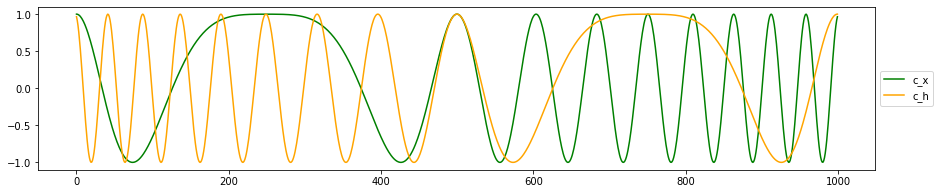

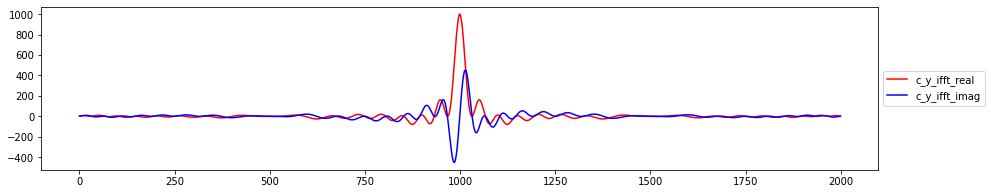

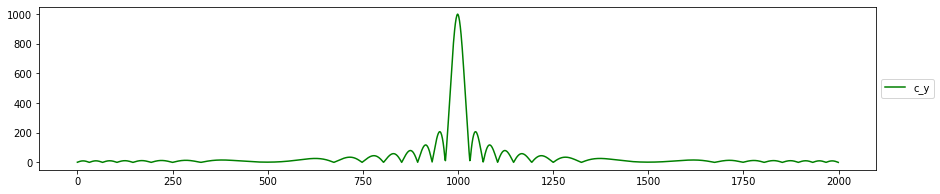

In [ ]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import scipy.signal as s
from math import sin, cos, exp, sqrt, cosh, log, pi
import math 
import scipy.fft as fft
import cmath

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

def task_6_2(w_delt, t0, t1, h):
    t_len = int((t1-t0)/h)
    h_1 = lambda t: (t1-t)
    freq = lambda t: -w_delt*t+2*w_delt*(t**2)/t1
    T = np.linspace(t0,t1,t_len)
    #x = np.asarray([sin(t*(freq(t)-w0)) for t in T])# добавить нули
    c_x = np.asarray([cmath.exp(complex(0, 1)*(freq(t))) for t in T])
    c_h = np.asarray([cmath.exp(-complex(0, 1)*(freq(h_1(t)))) for t in T])
    # графики
    fig = plt.figure(figsize=(15,3))
    plt.plot(c_x, color = 'green', label = 'c_x')
    plt.plot(c_h, color = 'orange', label = 'c_h')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    c_x_1 = np.hstack((c_x, np.zeros(t_len)))
    c_h_1 = np.hstack((c_h, np.zeros(t_len)))
    c_x_2 = fft.fft(c_x_1)
    c_h_2 = fft.fft(c_h_1)
    c_y = c_x_2 *c_h_2
    c_y_new =  fft.ifft(c_y)
    fig = plt.figure(figsize=(15,3))
    plt.plot(c_y_new.real, color = 'red', label = 'c_y_ifft_real') 
    plt.plot(c_y_new.imag, color = 'blue', label = 'c_y_ifft_imag')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig = plt.figure(figsize=(15,3))
    plt.plot(abs(c_y_new), color = 'green', label = 'c_y')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

task_6_2(5, 0, 10, 0.01)

## Лаба 6

In [ ]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import scipy.signal as s
from math import sin, cos, exp, sqrt, cosh, log, pi
import math 
import scipy.fft as fft
import cmath

import statsmodels.api as sm
lowess = sm.nonparametric.lowess


/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


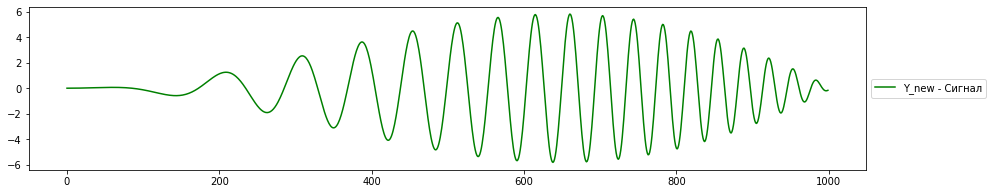

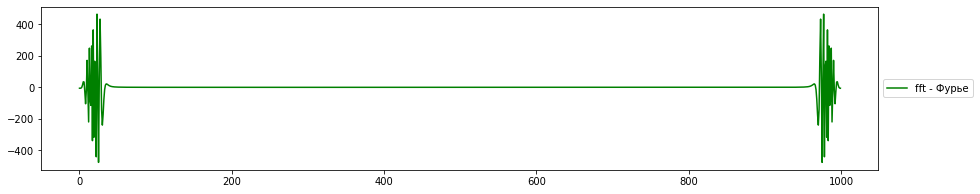

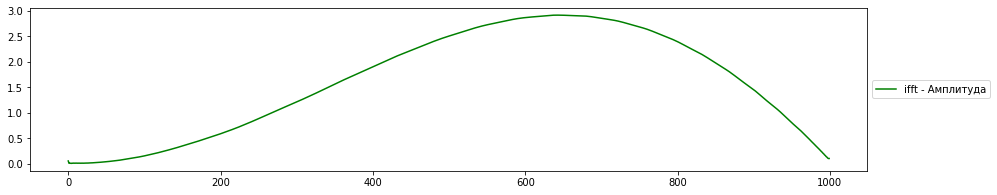

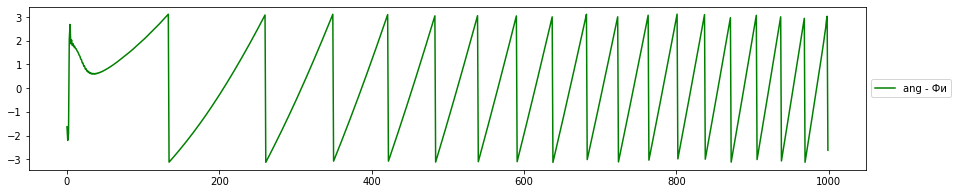

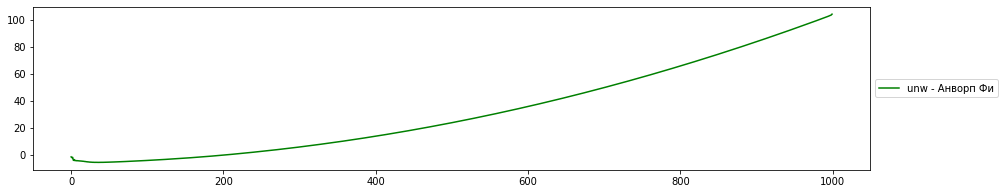

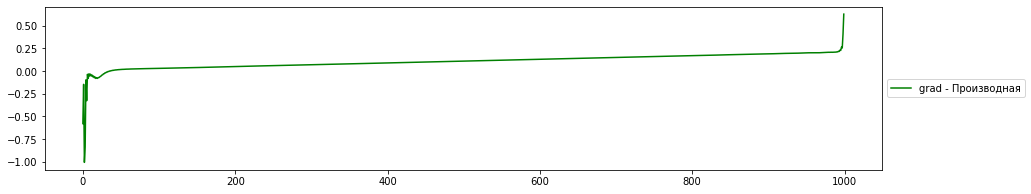

In [ ]:
def alp(w_min,w_max,t_len):
    return (w_max-w_min)/t_len

def test3_4():
    w_min = 1
    w_max = 1000
    t0 = 0
    t1 = 10
    h = 0.01
    
    freq = lambda t: w_min + alpha * t
    t_len = int((t1-t0)/h)
    alpha = alp(w_min,w_max,t_len)
    
    # дискретизируем аналоговый сигнал
    T = np.linspace(t0, t1, t_len)
    X = np.asarray([t*sin(t/3.2)*math.cos(t*freq(t)) for t in T]) # добавить нули
    X_new = np.hstack((X, np.zeros(128*t_len)))
    
    # график
    fig = plt.figure(figsize=(15,3))
    plt.plot(X, color = 'green', label = 'Y_new - Сигнал')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
    #X_hil = s.hilbert(X)
    #X_res = X + X_hil*np.complex(0,1)
    
    fx = np.fft.fft(X)
    fx_1 = np.hstack((fx[:int(len(fx)/2)], np.zeros(int(len(fx)/2))))
    #fx = fx[:int(len(fx)/2)]
    fx_i = np.fft.ifft(fx_1)
    fx_a = abs(fx_i)
    
    
    # график
    fig = plt.figure(figsize=(15,3))
    plt.plot(fx, color = 'green', label = 'fft - Фурье')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    #obr = np.fft.ifft(fx_a)
    ang = np.angle(fx_i)
    unwr = np.unwrap(ang)
    gra = np.gradient(unwr)
    
    # график
    fig = plt.figure(figsize=(15,3))
    plt.plot(fx_a, color = 'green', label = 'ifft - Амплитуда')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    # график
    fig = plt.figure(figsize=(15,3))
    plt.plot(ang, color = 'green', label = 'ang - Фи')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    # график
    fig = plt.figure(figsize=(15,3))
    plt.plot(unwr, color = 'green', label = 'unw - Анворп Фи')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
    # график
    fig = plt.figure(figsize=(15,3))
    plt.plot(gra, color = 'green', label = 'grad - Производная')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    
test3_4()    

## Лаба 7

In [ ]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
import scipy.signal as s
from math import sin, cos, exp, sqrt, cosh, log, pi
import math 
import scipy.fft as fft
import cmath

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

from scipy.signal import butter, filtfilt

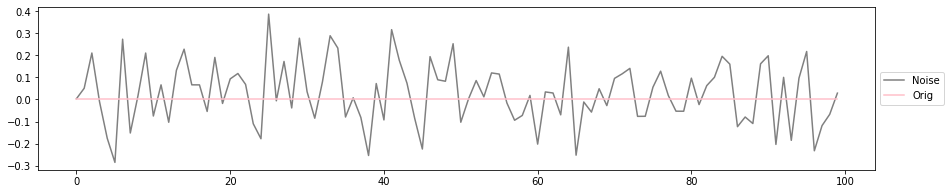

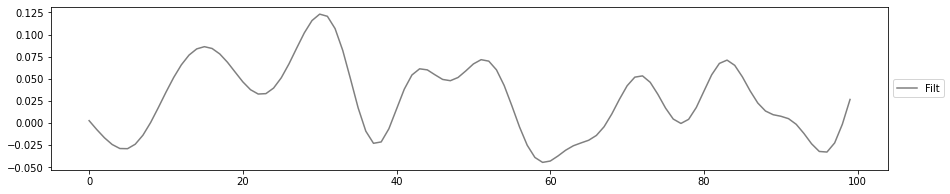

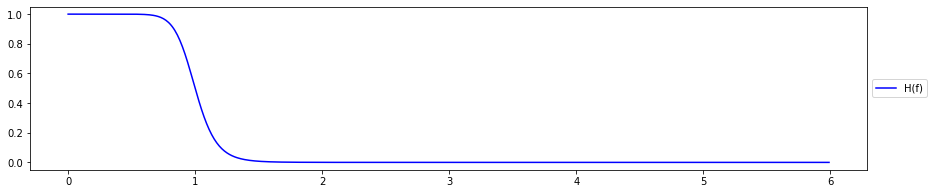

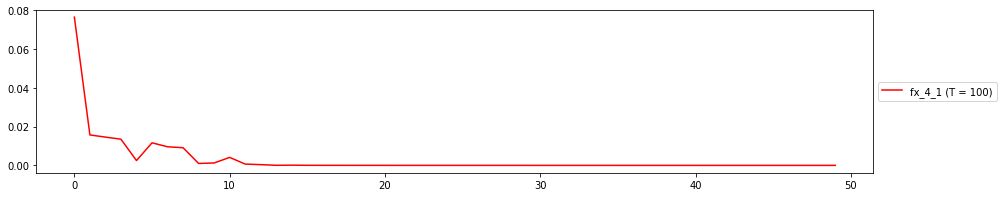

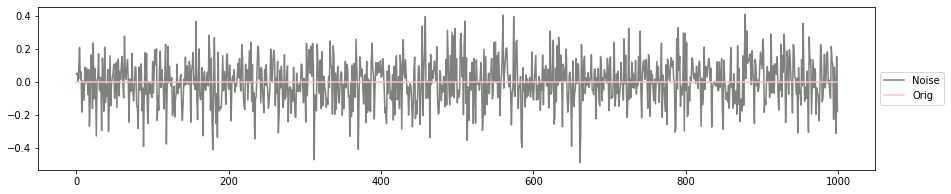

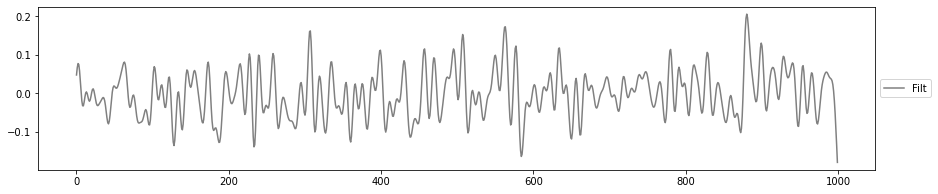

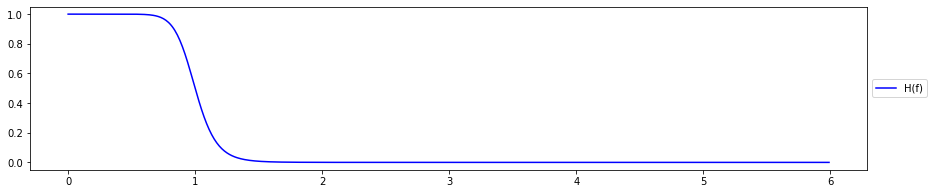

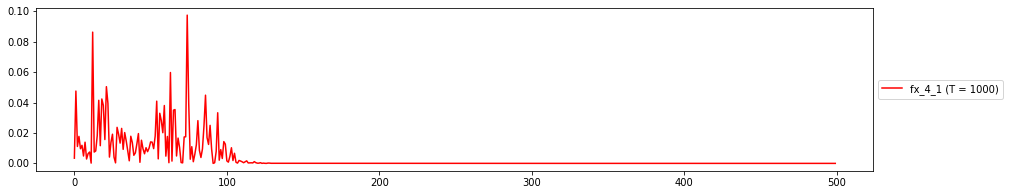

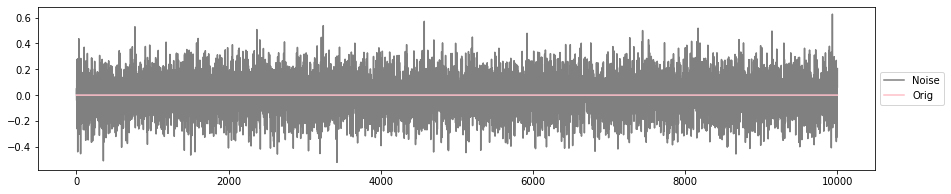

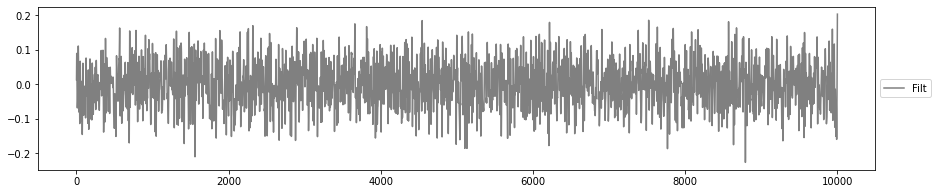

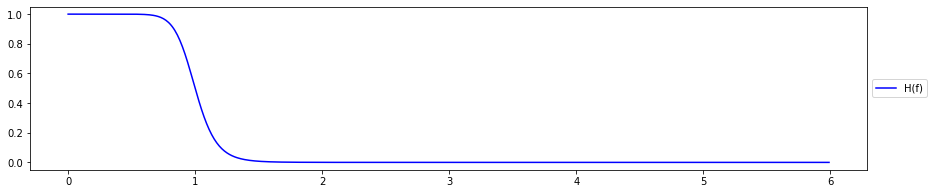

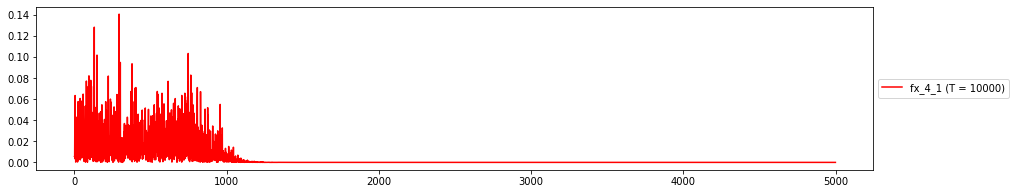

In [ ]:
def test0(n):
    
    
    # создаём шум
    
    X = np.transpose([*np.zeros(n)])
    
    N = 0.7
    F_max = 0.1
    sigma = math.sqrt(0.3 * N * F_max)
    
    
    S = np.random.standard_normal((2,n))
    X_new = X + S * sigma
    
    # filtfilt
    cutoff_freq = 0.2
    b,a = butter(6,cutoff_freq, btype='low', analog=False)#'lowpass')    
    Filt = filtfilt(b, a, X_new[0])
    
    # графики
    fig = plt.figure(figsize=(15,3))
    plt.plot(X_new[0], color = 'gray', label = 'Noise')
    plt.plot(X, color = 'pink', label = 'Orig')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # графики
    fig = plt.figure(figsize=(15,3))
    plt.plot(Filt, color = 'gray', label = 'Filt')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    return n, Filt
    
def test1(n1,Filt):
    
    
    
    # ачх баттерворта 6-го порядка
    w = np.transpose([*np.zeros(600)])
    m = 0
    for i in np.arange(0.0, 6.0, 0.01):
        w[m] = i
        m = m + 1
    Hf = np.transpose([*np.zeros(600)])
    
    for i in range(600):
        Hf[i] = 1/(1+((i/100)/1)**(2*6))
    
    
    
    
    
    fx = np.fft.fft(Filt)
    #fx_1 = np.hstack((fx[:int(len(fx)/2)], np.zeros(int(len(fx)/2))))
    #fx = fx[:int(len(fx)/2)]
    fx_2 = abs(fx*fx)
    fx_3 = np.hstack((fx_2[:int(len(fx_2)/2)]))
    fx_4 = fx_3/n1
    
    
    
    # график ачх баттерворта
    fig = plt.figure(figsize=(15,3))
    plt.plot(w,Hf, color = 'blue', label = 'H(f)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    #print('')
    #print('T = %s'%n1)
    
    # графики
    fig = plt.figure(figsize=(15,3))
    plt.plot(fx_4, color = 'red', label = 'fx_4_1 (T = %s)' % n)
    #plt.plot(fx_4_2, color = 'green', label = 'fx_4_2 (T = 1000)')
    #plt.plot(fx_4_3, color = 'gray', label = 'fx_4_3 (T = 10000)')
    
    #plt.plot(Hf, color = 'blue', label = 'H(f)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # отношение мощностей
    '''
    integral_lowess = np.trapz((y_smooth**2), Y)/n
    print('P of Lowess ',integral_lowess)
    integral_butter = np.trapz((Filt**2), Y)/n
    print('P of Butter ',integral_butter)
    integral_noise = np.trapz((X_new[0]**2), Y)/n
    print('P of Noise ',integral_noise)
    
    print('Отношение мощности сигнала после Lowess фильтра к мощности шума помноженный на 10lg',10*np.log10(integral_lowess/integral_noise))
    
    print('Отношение мощности сигнала после Butter фильтра к мощности шума помноженный на 10lg',10*np.log10(integral_butter/integral_noise))
    #, integral_lowess/integral_noise ,integral_butter/integral_noise'''
    
n, F = test0(100)
test1(n,F)

n, F = test0(1000)
test1(n,F)

n, F = test0(10000)
test1(n,F)


#n, F = test0(100000)
#test1(n,F)